In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import os, glob
import h5py

import sys
sys.path.append('../../')
import analysis_utils as utils
utils.load_plotting_setting()

import calc_gas_collision_spectrum as calc_gas

In [5]:
import importlib
importlib.reload(utils)
importlib.reload(calc_gas)

<module 'calc_gas_collision_spectrum' from '/Users/yuhan/work/nanospheres/gas_collisiions/analysis_notebooks/sphere_20260105/../../calc_gas_collision_spectrum.py'>

In [6]:
sphere = 'sphere_20260105'
amp2kev = 6792.86423779262

def read_recon(file):
    f = h5py.File(file, 'r')
    try:
        pressure = f['data_processed'].attrs['pressure_mbar']

        amps = f['data_processed']['amplitude'][:]
        good_detection = f['data_processed']['good_detection'][:]
        noise_level_amp = f['data_processed']['noise_level_amp'][:]
        chi2 = f['data_processed']['chisquare'][:]
        f_res = f['data_processed']['f_res'][:]
        driven_power = f['data_processed']['driven_power'][:]

        f.close()

        return amps, good_detection, noise_level_amp, chi2, f_res, driven_power, pressure
    except:
        f.close()

def read_recon_all(dataset, type, file_prefix, nfiles):
    amps_all, good_detection_all, noise_level_all, chi2_all, driven_power_all, f_res_all, pressure_all = [], [], [], [], [], [], []
    for i in range(nfiles):
        file = rf'/Users/yuhan/work/nanospheres/data/gas_data_processed/{sphere}/{type}/{dataset}/{file_prefix}{i}_processed.hdf5'
        amps, good_detection, noise_level_amp, chi2, f_res, driven_power, pressure = read_recon(file)

        amps_all.append(amps)
        good_detection_all.append(good_detection)
        noise_level_all.append(noise_level_amp)
        chi2_all.append(chi2)
        driven_power_all.append(driven_power)
        f_res_all.append(f_res)
        pressure_all.append(pressure)

    return amps_all, good_detection_all, noise_level_all, chi2_all, driven_power_all, f_res_all, pressure_all

def get_summed_histogram(amps, good_detection, noise_level_amp, chi2, driven_power, f_res, amp2kev):
    noise_threshold_kev = 75
    chi2_threshold = 700
    normalized_drive_power_threshold = 1.75e-8

    drive_freq = 137000
    ref_freq = 48500

    bins = np.arange(0, 2000, 25)  # keV
    bc = 0.5 * (bins[:-1] + bins[1:])
    hh_all = np.zeros_like(bc, dtype=np.int64)

    for i in range(len(good_detection)):
        _good_window = np.logical_and(good_detection[i], noise_level_amp[i]*amp2kev < noise_threshold_kev)
    
        normalized_drive_power = driven_power[i] * (f_res[i]**2 - drive_freq**2)**2 / ((ref_freq**2 - drive_freq**2)**2)
        good_window = np.logical_and(_good_window, normalized_drive_power > normalized_drive_power_threshold)

        _good_amps = amps[i][good_window]
        _good_amps_chi2 = chi2[i][good_window]

        good_amps = _good_amps[_good_amps_chi2 < chi2_threshold]
        _hh, _ = np.histogram(np.abs(good_amps) * amp2kev, bins)

        hh_all += _hh

    return bc, hh_all

In [7]:
amps_0, good_detection_0, noise_level_0, chi2_0, driven_power_0, f_res_0, pressure_0 = read_recon_all('20260107_p8e_4e-8mbar', 'background_data', '20260107_df_', 150)
amps_1, good_detection_1, noise_level_1, chi2_1, driven_power_1, f_res_1, pressure_1 = read_recon_all('20260107_p8e_3e-8mbar_valveclosed', 'background_data', '20260107_df_', 150)

amps_2, good_detection_2, noise_level_2, chi2_2, driven_power_2, f_res_2, pressure_2 = read_recon_all('20260107_p8e_5e-8mbar', 'xenon_data', '20260107_df_', 150)
amps_3, good_detection_3, noise_level_3, chi2_3, driven_power_3, f_res_3, pressure_3 = read_recon_all('20260107_p8e_6e-8mbar', 'xenon_data', '20260107_df_', 150)
amps_4, good_detection_4, noise_level_4, chi2_4, driven_power_4, f_res_4, pressure_4 = read_recon_all('20260107_p8e_8e-8mbar', 'xenon_data', '20260107_df_', 150)
amps_5, good_detection_5, noise_level_5, chi2_5, driven_power_5, f_res_5, pressure_5 = read_recon_all('20260107_p8e_1e-7mbar', 'xenon_data', '20260107_df_', 150)
amps_6, good_detection_6, noise_level_6, chi2_6, driven_power_6, f_res_6, pressure_6 = read_recon_all('20260107_p8e_2e-7mbar', 'xenon_data', '20260107_df_', 150)


In [8]:
datasets_all = ['20260107_p8e_4e-8mbar', '20260107_p8e_3e-8mbar_valveclosed', '20260107_p8e_5e-8mbar', '20260107_p8e_6e-8mbar', '20260107_p8e_8e-8mbar', '20260107_p8e_1e-7mbar', '20260107_p8e_2e-7mbar']

amps_all = [amps_0, amps_1, amps_2, amps_3, amps_4, amps_5, amps_6]
f_res_all = [f_res_0, f_res_1, f_res_2, f_res_3, f_res_4, f_res_5, f_res_6]
driven_power_all = [driven_power_0, driven_power_1, driven_power_2, driven_power_3, driven_power_4, driven_power_5, driven_power_6]
noise_level_all = [noise_level_0, noise_level_1, noise_level_2, noise_level_3, noise_level_4, noise_level_5, noise_level_6]
chi2_all = [chi2_0, chi2_1, chi2_2, chi2_3, chi2_4, chi2_5, chi2_6]


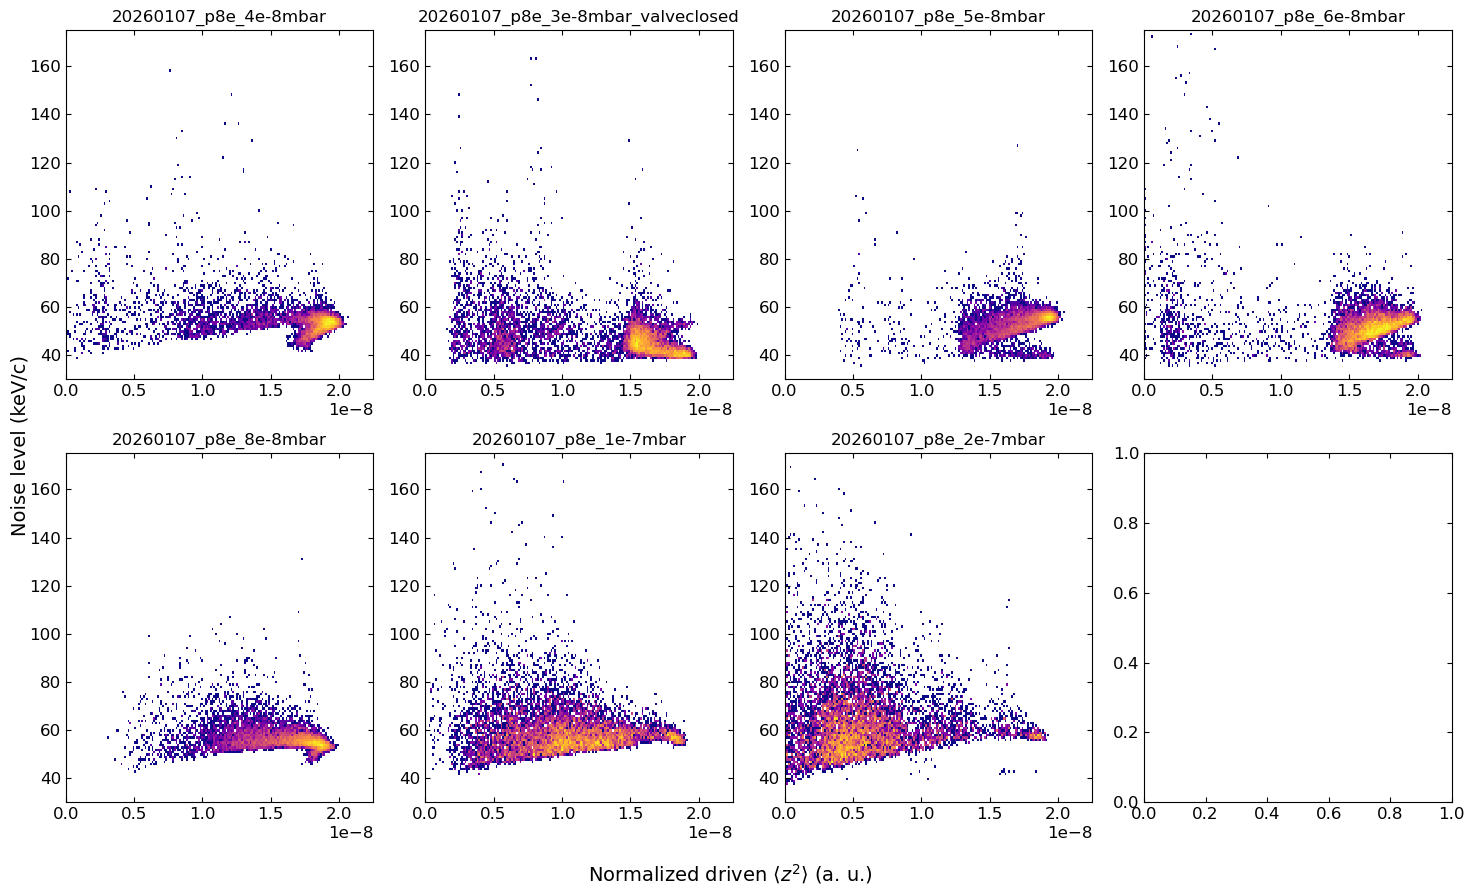

In [9]:
xbins = np.linspace(0, 2.5e-8, 200)
ybins = np.linspace(0, 200, 200)

fig, axes = plt.subplots(2, 4, figsize=(15, 9))
for i in range(len(driven_power_all)):
    ax = axes.flatten()[i]

    _drive = np.concatenate(driven_power_all[i])
    _freq  = np.concatenate(f_res_all[i])
    drive_freq = 137000
    ref_freq = 48500
    normalized_drive_power = _drive * (_freq**2 - drive_freq**2)**2 / ((ref_freq**2 - drive_freq**2)**2)

    hh, _, _ = np.histogram2d(x=normalized_drive_power, y=np.concatenate(noise_level_all[i])*amp2kev, bins=(xbins, ybins))
    pc = ax.pcolormesh(xbins, ybins, hh.T, norm=mcolors.LogNorm(), cmap='plasma')

    ax.set_xlim(0, 2.25e-8)
    ax.set_ylim(30, 175)
    ax.set_title(datasets_all[i], fontsize=12)

fig.supxlabel(r'Normalized driven $\langle z^2 \rangle$ (a. u.)', fontsize=14)
fig.supylabel(r'Noise level (keV/c)', fontsize=14)
fig.tight_layout()


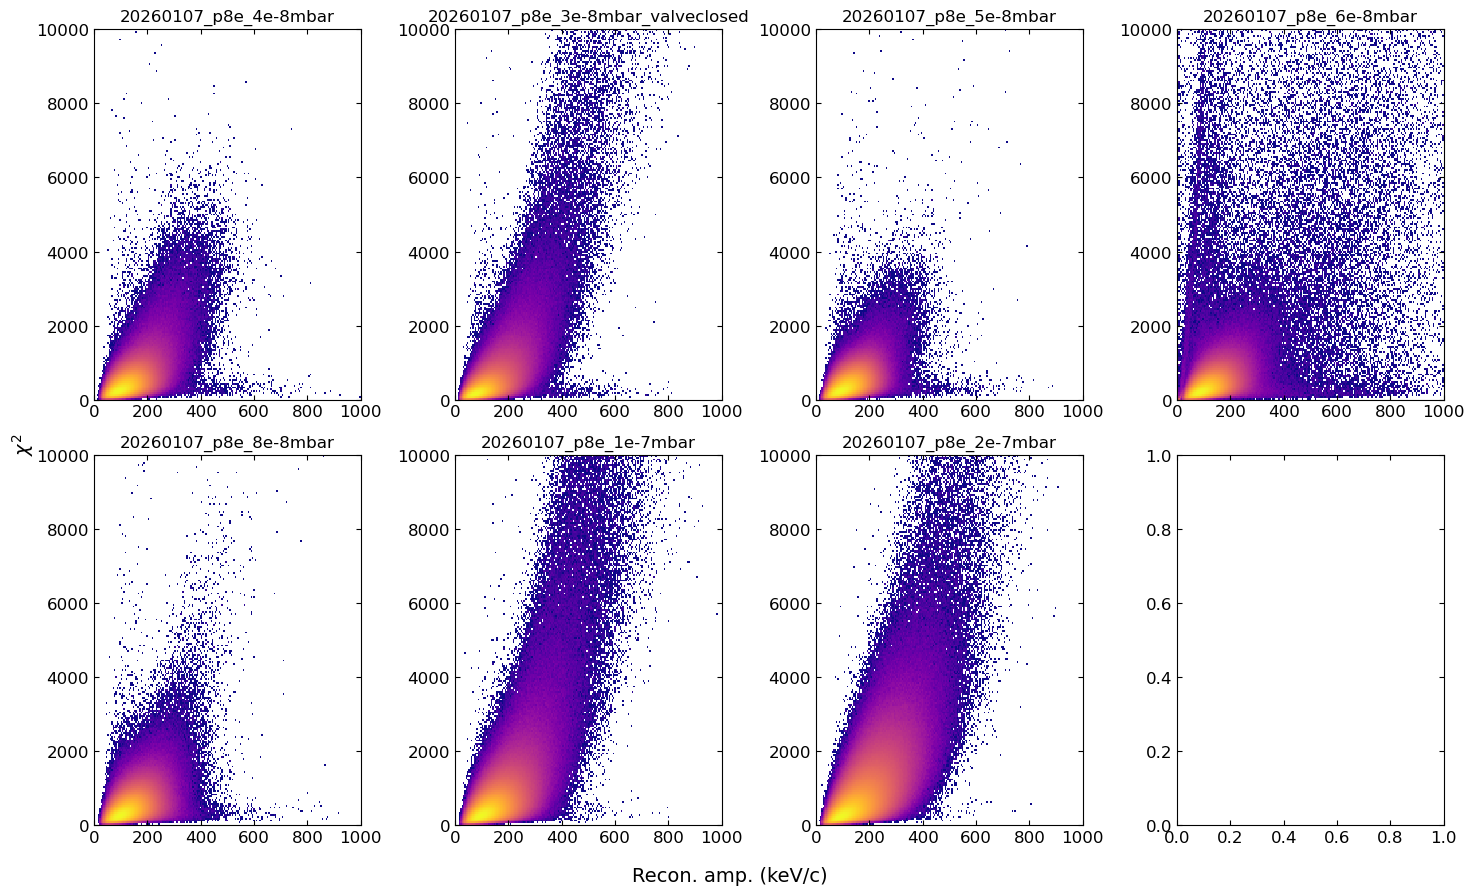

In [10]:
xbins = np.linspace(0, 1000, 200)
ybins = np.linspace(0, 10000, 200)

fig, axes = plt.subplots(2, 4, figsize=(15, 9))
for i in range(len(driven_power_all)):
    ax = axes.flatten()[i]

    hh, _, _ = np.histogram2d(x=np.concatenate(np.abs(amps_all[i])).flatten()*amp2kev, y=np.concatenate(chi2_all[i]).flatten(), bins=(xbins, ybins))
    pc = ax.pcolormesh(xbins, ybins, hh.T, norm=mcolors.LogNorm(), cmap='plasma')

    ax.set_title(datasets_all[i], fontsize=12)

fig.supxlabel(r'Recon. amp. (keV/c)', fontsize=14)
fig.supylabel(r'$\chi^2$', fontsize=14)
fig.tight_layout()


In [207]:
sphere = 'sphere_20260105'
data_prefix = '20260107_df_'

ffs, pps = [], []
for i, dataset in enumerate(datasets_all):
    if i < 2:
        type = 'background_data'
    else:
        type = 'xenon_data'
    
    data_dir = rf'/Volumes/LaCie/gas_collisions/{type}/{sphere}/{dataset}'

    _file = os.path.join(data_dir, f'{data_prefix}129.hdf5')
    f = h5py.File(_file, "r")

    dtt = f['data'].attrs['delta_t']
    fs = int(np.ceil(1 / dtt))   # Sampling rate at Hz
    zz = f['data']['channel_d'][:] * f['data']['channel_d'].attrs['adc2mv'] / 1e3  # Signal in V
    
    f.close()

    ff, pp = utils.get_psd(dt=dtt, zz=zz, nperseg=2**16)
    ffs.append(ff)
    pps.append(pp)

Text(0, 0.5, 'PSD (V$^2$/Hz)')

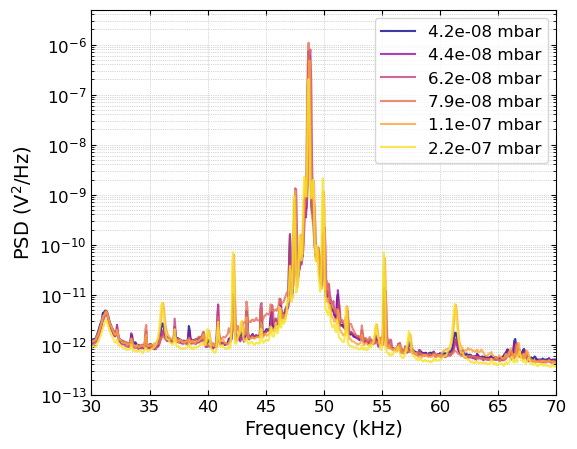

In [208]:
plot_idx = [0, 2, 3, 4, 5, 6]
pressures_all = [pressure_0, pressure_1, pressure_2, pressure_3, pressure_4, pressure_5, pressure_6]

cmap = plt.colormaps.get_cmap('plasma')
colors = cmap(np.linspace(0, 0.95, 7))

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
for i in plot_idx:
    ax.plot(ffs[i]/1000, pps[i], color=colors[i], label=f'{np.mean(pressures_all[i]):.1e} mbar', alpha=0.8)

ax.set_yscale('log')
ax.set_xlim(30, 70)
ax.set_ylim(1e-13, 5e-6)
ax.legend()
ax.grid(which='both', ls=':', linewidth=0.5)

ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('PSD (V$^2$/Hz)')

In [11]:
bc, hh_all_bg_0 = get_summed_histogram(amps_0, good_detection_0, noise_level_0, chi2_0, driven_power_0, f_res_0, amp2kev)
bc, hh_all_bg_1 = get_summed_histogram(amps_1, good_detection_1, noise_level_1, chi2_1, driven_power_1, f_res_1, amp2kev)

bc, hh_all_xe_0 = get_summed_histogram(amps_2, good_detection_2, noise_level_2, chi2_2, driven_power_2, f_res_2, amp2kev)
bc, hh_all_xe_1 = get_summed_histogram(amps_3, good_detection_3, noise_level_3, chi2_3, driven_power_3, f_res_3, amp2kev)
bc, hh_all_xe_2 = get_summed_histogram(amps_4, good_detection_4, noise_level_4, chi2_4, driven_power_4, f_res_4, amp2kev)
bc, hh_all_xe_3 = get_summed_histogram(amps_5, good_detection_5, noise_level_5, chi2_5, driven_power_5, f_res_5, amp2kev)
bc, hh_all_xe_4 = get_summed_histogram(amps_6, good_detection_6, noise_level_6, chi2_6, driven_power_6, f_res_6, amp2kev)


In [248]:
datasets_all

['20260107_p8e_4e-8mbar',
 '20260107_p8e_3e-8mbar_valveclosed',
 '20260107_p8e_5e-8mbar',
 '20260107_p8e_6e-8mbar',
 '20260107_p8e_8e-8mbar',
 '20260107_p8e_1e-7mbar',
 '20260107_p8e_2e-7mbar']

In [12]:
sphere = 'sphere_20260105'
outfile_name = f'{sphere}_gas_recon_all.h5py'
outdir = r'/Users/yuhan/work/nanospheres/gas_collisiions/data_processed/gas_recon'
print(f'Saving file {outfile_name}')

with h5py.File(os.path.join(outdir, outfile_name), 'w') as fout:
    g = fout.create_group('recon_histograms')

    d = g.create_dataset('bc', data=bc, dtype=np.float64)
    d.attrs['unit'] = 'keV'

    d = g.create_dataset(f'hist_{datasets_all[0]}', data=(hh_all_bg_0), dtype=np.int64)
    d = g.create_dataset(f'hist_{datasets_all[1]}', data=(hh_all_bg_1), dtype=np.int64)
    d = g.create_dataset(f'hist_{datasets_all[2]}', data=(hh_all_xe_0), dtype=np.int64)
    d = g.create_dataset(f'hist_{datasets_all[3]}', data=(hh_all_xe_1), dtype=np.int64)
    d = g.create_dataset(f'hist_{datasets_all[4]}', data=(hh_all_xe_2), dtype=np.int64)
    d = g.create_dataset(f'hist_{datasets_all[5]}', data=(hh_all_xe_3), dtype=np.int64)
    d = g.create_dataset(f'hist_{datasets_all[6]}', data=(hh_all_xe_4), dtype=np.int64)

    d.attrs['unit'] = 'count/25keV'
    fout.close()

Saving file sphere_20260105_gas_recon_all.h5py


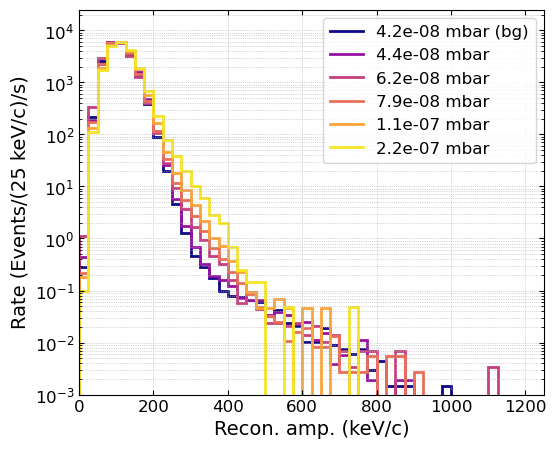

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

cmap = plt.colormaps.get_cmap('plasma')
colors = cmap(np.linspace(0, 0.95, 7))

bins = np.arange(0, 2000, 25)
ax.stairs(hh_all_bg_0/(50e-6 * np.sum(hh_all_bg_0)), edges=bins, color=colors[0], label=f'{np.mean(pressure_0):.1e} mbar (bg)', linewidth=2)
# ax.stairs(hh_all_bg_1/(50e-6 * np.sum(hh_all_bg_1)), edges=bins, color=colors[1], label=f'{np.mean(pressure_1):.1e} mbar (bg)', linewidth=2)

ax.stairs(hh_all_xe_0/(50e-6 * np.sum(hh_all_xe_0)), edges=bins, color=colors[2], label=f'{np.mean(pressure_2):.1e} mbar', linewidth=2)
ax.stairs(hh_all_xe_1/(50e-6 * np.sum(hh_all_xe_1)), edges=bins, color=colors[3], label=f'{np.mean(pressure_3):.1e} mbar', linewidth=2)
ax.stairs(hh_all_xe_2/(50e-6 * np.sum(hh_all_xe_2)), edges=bins, color=colors[4], label=f'{np.mean(pressure_4):.1e} mbar', linewidth=2)
ax.stairs(hh_all_xe_3/(50e-6 * np.sum(hh_all_xe_3)), edges=bins, color=colors[5], label=f'{np.mean(pressure_5):.1e} mbar', linewidth=2)
ax.stairs(hh_all_xe_4/(50e-6 * np.sum(hh_all_xe_4)), edges=bins, color=colors[6], label=f'{np.mean(pressure_6):.1e} mbar', linewidth=2)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(0, 1250)
ax.set_ylim(1e-3, 2.5e4)
ax.legend()

ax.set_xlabel('Recon. amp. (keV/c)')
ax.set_ylabel('Rate (Events/(25 keV/c)/s)')

ax.grid(which='both', ls=':', linewidth=0.5)

In [ ]:
def get_xe_theory(sphere_radius, pressure_mbar, sig_p_kev):
    sphere_radius = 50e-9
    alpha = 0.9
    T_sensor = 900
    
    qq_kev = np.linspace(10, 10000, 200)

    drdq_xe = calc_gas.dgamma_dp_tot_noneq(qq_kev, 131.3, pressure_mbar, alpha, 293, T_sensor, sphere_radius)
    qqz, drdqz_xe = calc_gas.get_drdqz(qq_kev, drdq_xe)

    qqzn, drdqzn_xe = calc_gas.smear_drdqz_gauss(qqz, drdqz_xe, sig_p_kev)

    return qqzn, drdqzn_xe

In [224]:
qq_kev, drdqzn_xe = get_xe_theory(50e-9, 1e-8, 60)

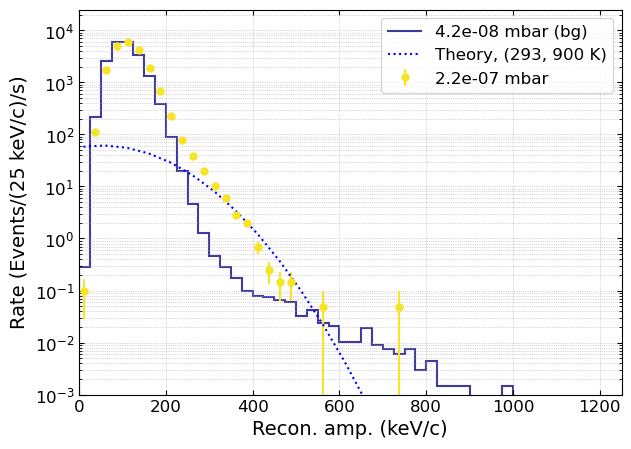

In [225]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

# ax.plot(bc, hh_all_bg_0/(50e-6 * np.sum(hh_all_bg_0)), color=colors[0], label=f'{np.mean(pressure_0):.1e} mbar', linewidth=1.5)
ax.stairs(hh_all_bg_0/(50e-6 * np.sum(hh_all_bg_0)), edges=bins, color=colors[0], label=f'{np.mean(pressure_0):.1e} mbar (bg)', linewidth=1.5, alpha=0.8)

ax.errorbar(bc, hh_all_xe_4/(50e-6 * np.sum(hh_all_xe_4)), yerr=np.sqrt(hh_all_xe_4)/(50e-6 * np.sum(hh_all_xe_4)), fmt='.', color=colors[6], label=f'{np.mean(pressure_6):.1e} mbar', markersize=10)
ax.plot(qq_kev, drdqzn_xe*25, 'b:', label=f'Theory, (293, 900 K)')

ax.grid()
ax.set_xlim(0, 1250)
ax.set_yscale('log')

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(0, 1250)
ax.set_ylim(1e-3, 2.5e4)
ax.legend()

ax.set_xlabel('Recon. amp. (keV/c)')
ax.set_ylabel('Rate (Events/(25 keV/c)/s)')

ax.grid(which='both', ls=':', linewidth=0.5)


In [251]:
signal_file = r'/Users/yuhan/work/nanospheres/gas_collisiions/data_processed/gas_signal/xe_signal_5e-08nm_1e-08mbar.npz'
with np.load(signal_file) as f:
    alpha_list = f['alpha_list']
    ts_list = f['ts_list']
    qq_kev = f['qq_kev']
    drdqz = f['drdqz']

(0.0, 1000.0)

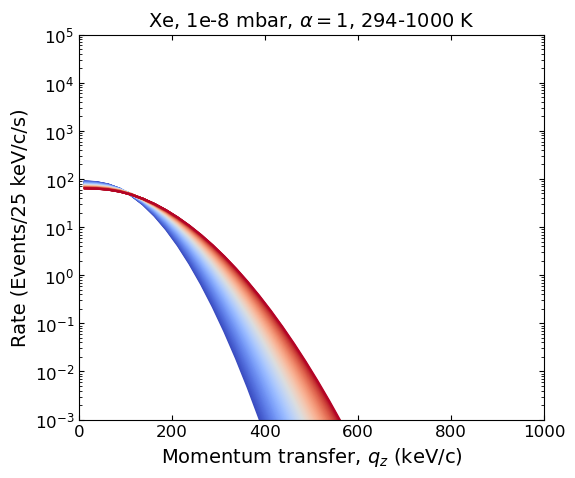

In [252]:
cmap = plt.colormaps.get_cmap('coolwarm')
colors_xe = cmap(np.linspace(0, 1, 100))

fig, ax = plt.subplots(figsize=(6, 5))
for i in range(100):
    ax.plot(qq_kev, 25*drdqz[-1][i], color=colors_xe[i])

plt.title(r'Xe, 1e-8 mbar, $\alpha=1$, 294-1000 K')
plt.xlabel('Momentum transfer, $q_z$ (keV/c)')
plt.ylabel('Rate (Events/25 keV/c/s)')

plt.yscale('log')
plt.ylim(1e-3, 1e5)
plt.xlim(0, 1000)